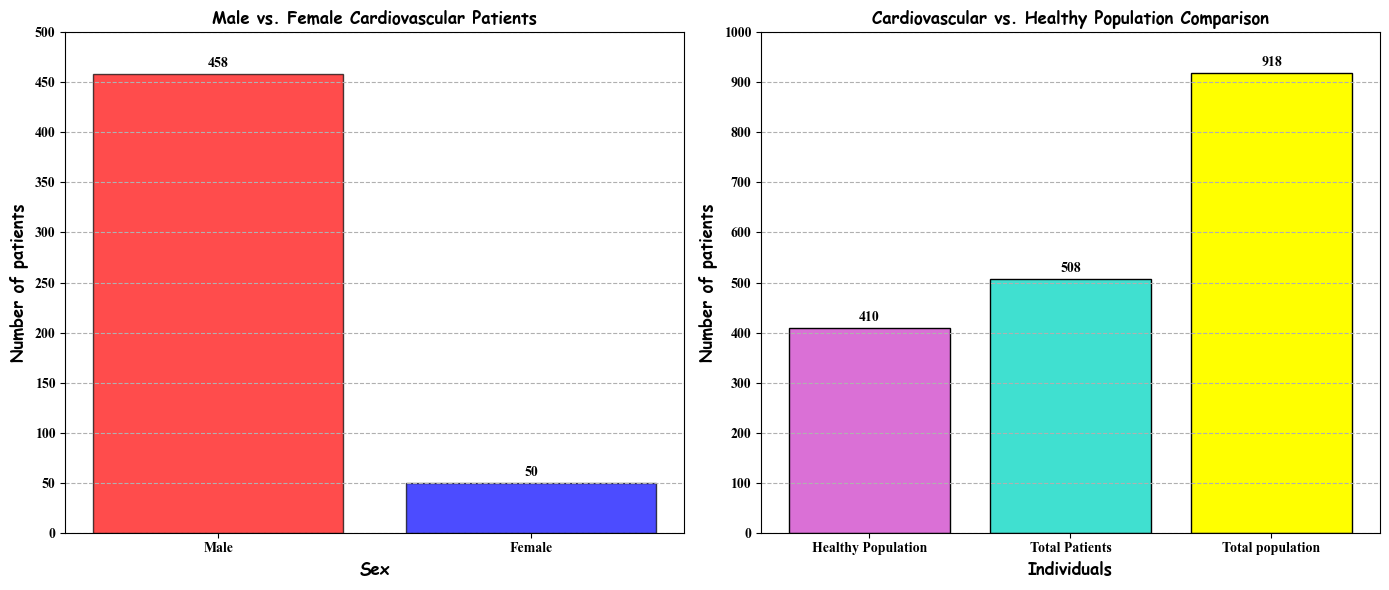

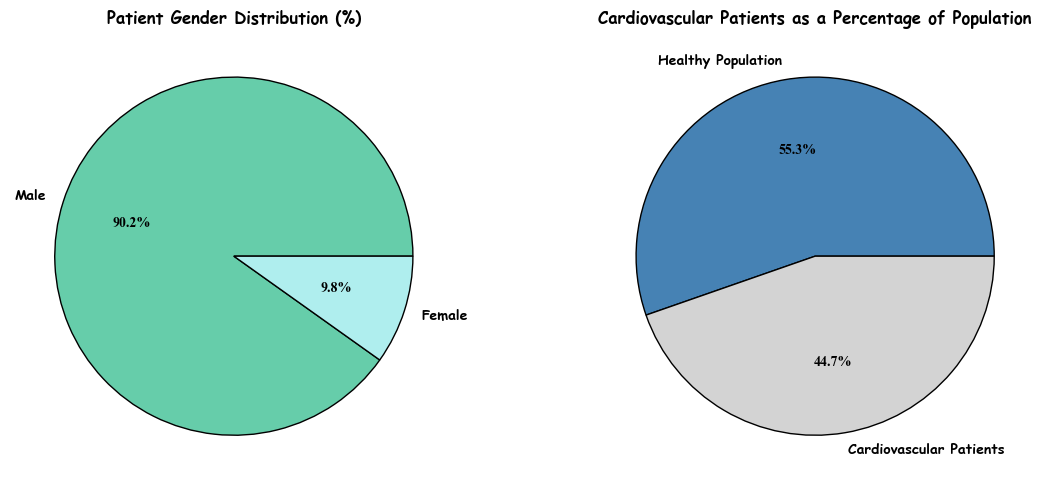

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


""" 
Classify cardiovascular patients
based on Sex (Male and Female),
SECTION ONE
"""

# Load the Dataframe
df = pd.read_csv("../data/heart-data.csv")

# Count the number of cardiovascular patients
filterd = df[df["HeartDisease"] == 1]
sex_counts = filterd["Sex"].value_counts()
male = sex_counts.get("M", 0)
female = sex_counts.get("F", 0)
total = np.add(male, female)

# Calculate the precentages of cardiovascular patients
Mpct, Fpct = (np.divide(np.multiply(male, 100), total)), (np.divide(np.multiply(female, 100), total))
total_precentage = np.divide(np.multiply(total, 100), df["Sex"].count())

# make the new Dataframe for number of cardiovascular patients
df_of_patients_num = pd.DataFrame({"Sex": ["M", "F"],
                                   "Number of cardiovascular patients": [male, female],
                                   "Total": total, "Percentage of patients by sex": [Mpct, Fpct],
                                   "Total percentage of patients": total_precentage})


"""
Customize some properties of visualizations
"""
title = {"fontname": "Comic Sans MS", "fontweight": "bold", "fontsize": 12}
labels = {"fontname": "Times New Roman", "fontweight": "bold"}

                  
"""
Create the visualizations, 
SECTION ONE
"""
# Bar chart1, show the Comparison bars of male and female patients
def barChart1(ax, title, labels):
    # Set plot1
    ax.bar(
        df_of_patients_num["Sex"], 
        df_of_patients_num["Number of cardiovascular patients"],
        color=["red", "blue"], edgecolor="black", alpha=0.7
        )
    ax.set_title("Male vs. Female Cardiovascular Patients", fontdict=title)
    ax.set_xlabel("Sex", fontdict=title)
    ax.set_ylabel("Number of patients", fontdict=title)
    ax.set_yticks(np.arange(550, step=50))
    ax.set_yticklabels(np.arange(550, step=50), fontdict=labels)
    ax.grid(axis="y", linestyle="--")
    
    # Adjust font and style of x tick labels
    ax.set_xticks(range(len(["Male", "Female"])))
    ax.set_xticklabels(["Male", "Female"])

    for l in ax.get_xticklabels():
        l.set_fontname("Times New Roman")
        l.set_fontweight("bold")

    # Annotate the exact counts in plot1
    for i in range(len(df_of_patients_num)):
        s = df_of_patients_num["Sex"][i]
        n = df_of_patients_num["Number of cardiovascular patients"][i]
        ax.annotate(n, xy=(s, n), xytext=(0, 5), textcoords="offset points", ha="center",
                        fontname="Times New Roman", fontweight="bold")


# Bar chart2, show the Comparison bars of total heart disease patients vs total population
def barChart2(ax, title, labels):
    # Set plot2
    x = ["Healthy Population", "Total Patients", "Total population"]
    y = [np.subtract(df["Sex"].count(), df_of_patients_num.iloc[0, 2]),
        df_of_patients_num.iloc[0, 2],
        df["Sex"].count()]
    ax.bar(x, y, color=["orchid", "turquoise", "yellow"], edgecolor="black")
    ax.set_title("Cardiovascular vs. Healthy Population Comparison", fontdict=title)
    ax.set_xlabel("Individuals", fontdict=title)
    ax.set_ylabel("Number of patients", fontdict=title)
    ax.set_yticks(np.arange(1050, step=100))
    ax.set_yticklabels(np.arange(1050, step=100), fontdict=labels)
    ax.grid(axis="y", linestyle="--")
    
    # Adjust font and style of x tick labels
    ax.set_xticks(range(len(x)))
    ax.set_xticklabels(x)

    for l in ax.get_xticklabels():
        l.set_fontname("Times New Roman")
        l.set_fontweight("bold")
                    
    # Annotate the exact counts in plot2
    for i, v in enumerate(y):
        ax.annotate(v, xy=(x[i], y[i]), xytext=(0, 5), textcoords="offset points", ha="center",
                        fontname="Times New Roman", fontweight="bold")
   


# Pie chart1, Show the percentage of male vs female patients out of all cardiovascular patients
def pieChart1(ax, title):
    wedges1, texts1, autotexts1 = ax.pie(df_of_patients_num["Number of cardiovascular patients"],
                labels=["Male", "Female"], autopct="%1.1f%%", colors=["mediumaquamarine", "paleturquoise"])
    for w1 in wedges1:
        w1.set_edgecolor("black")

    for t1 in texts1:
        t1.set_fontname("Comic Sans MS")
        t1.set_fontweight("bold")
    
    for a1 in autotexts1:
        a1.set_fontname("Times New Roman")
        a1.set_fontweight("bold")

    ax.set_title("Patient Gender Distribution (%)", fontdict=title) 


#Pie chart2, Show the percentage of cardiovascular patients out of all population
def pieChart2(ax, title):
    wedges2, texts2, autotexts2 = ax.pie([df_of_patients_num["Total"][0],
                                np.subtract(df.shape[0], df_of_patients_num["Total"][0])],
                            labels=["Healthy Population", "Cardiovascular Patients"],
                        autopct="%1.1f%%", colors=["steelblue", "lightgray"])
    for w2 in wedges2:
        w2.set_edgecolor("black")

    for t2 in texts2:
        t2.set_fontname("Comic Sans MS")
        t2.set_fontweight("bold")

    for a2 in autotexts2:
        a2.set_fontname("Times New Roman")
        a2.set_fontweight("bold")

    ax.set_title("Cardiovascular Patients as a Percentage of Population", fontdict=title) 

# Save the table
#df_of_patients_num.to_csv(...)

# Set, Run and Show bar charts
fig1, axs1 = plt.subplots(1, 2, figsize=[14, 6])
barChart1(axs1[0], title, labels)
barChart2(axs1[1], title, labels)
plt.tight_layout()
#plt.savefig(...)
plt.show()

# Set, Run and Show pie charts
fig2, axs2 = plt.subplots(1, 2, figsize=[12, 5])
pieChart1(axs2[0], title)
pieChart2(axs2[1], title)
plt.setp(axs2, aspect="equal")
plt.tight_layout()
#plt.savefig(...)
plt.show()


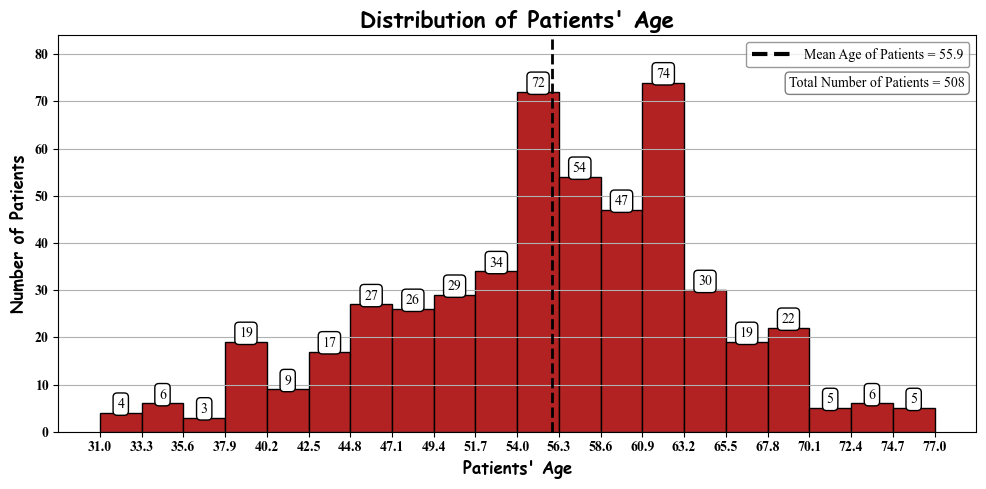

  minimum age of patients  maximum age of patients  mean age of patients
                       31                       77             55.899606


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D



""" 
Classify cardiovascular patients
based on Age,
SECTION TWO
"""

# Load the Dataframe
df = pd.read_csv("../data/heart-data.csv")

# Get and Calculate needed values
card_patients = df[df["HeartDisease"]==1]["Age"]
min_age = card_patients.min()
max_age = card_patients.max()
mean_age = card_patients.mean()


"""
Customize some properties of visualizations
"""
title = {"fontname": "Comic Sans MS", "fontsize": 16, "fontweight": "bold"}
label = {"fontname": "Comic Sans MS", "fontsize": 12, "fontweight": "bold"}
annotations ={"fontname": "Times New Roman", "bbox":{"facecolor": "white", "edgecolor": "black", "boxstyle": "round,pad=0.3"}}

"""
Create the visualizations, 
SECTION TWO
"""

def histogram(title, label, annotations):
    n, bins, patches = plt.hist(card_patients, range=(min_age, max_age),bins=20, color="firebrick", edgecolor="black")

    # Adjust the figure customization
    plt.title("Distribution of Patients' Age", fontdict=title)
    plt.xlabel("Patients' Age", fontdict=label)
    plt.ylabel("Number of Patients", fontdict=label)
    plt.ylim(top=max(n) + 10)
    plt.grid(axis="y")
    plt.tight_layout()

    # Add vertical line to indicate the mean age of patients
    plt.axvline(mean_age, linestyle="--", c="black", linewidth=2, label=f"Mean Age of Patients = {mean_age:.1f}")

    # Customize and set x and y ticks
    _, xlabels = plt.xticks(np.arange(min_age, max_age + 1, np.divide(np.subtract(max_age, min_age), 20)))
    _, ylabels = plt.yticks()

    for xl in xlabels:
        xl.set_fontname("Times New Roman")
        xl.set_fontweight("bold")

    for yl in  ylabels:
        yl.set_fontname("Times New Roman")
        yl.set_fontweight("bold")

    # Adjust and Add annotations 
    for count, left_bin, right_bin in zip(n, bins[:-1], bins[1:]):
        center_bin = np.divide(np.add(left_bin, right_bin), 2)
        plt.text(center_bin, count + 1, int(count), ha="center",
                fontdict=annotations)
        
    # Adjust the legend box
    custom_line = Line2D([0], [0], linestyle="--", c="black", linewidth=3 ,label=f"Mean Age of Patients = {mean_age:.1f}")
    [t.set_fontname("Times New Roman") for t in plt.legend(handles=[custom_line], handlelength=3, edgecolor="gray").get_texts()]

    # Adjust and add the 'Total number of patients' text box
    plt.text(69, 73, f"Total Number of Patients = {card_patients.count()}",
            fontname="Times New Roman", fontsize=10, bbox=dict(facecolor="white", edgecolor="gray", boxstyle="round,pad=0.3"))


def age_df():
    # Make the dataframe
    age_data = {"minimum age of patients": min_age, "maximum age of patients": max_age,
                "mean age of patients": mean_age}
    age_df = pd.DataFrame(age_data, index=[''])
    #age_df.to_csv(...)
    return age_df

# Set histogram, Show distribution of patients' age
plt.figure(figsize=[10, 5])
histogram(title, label, annotations)
#plt.savefig(...)
plt.show()



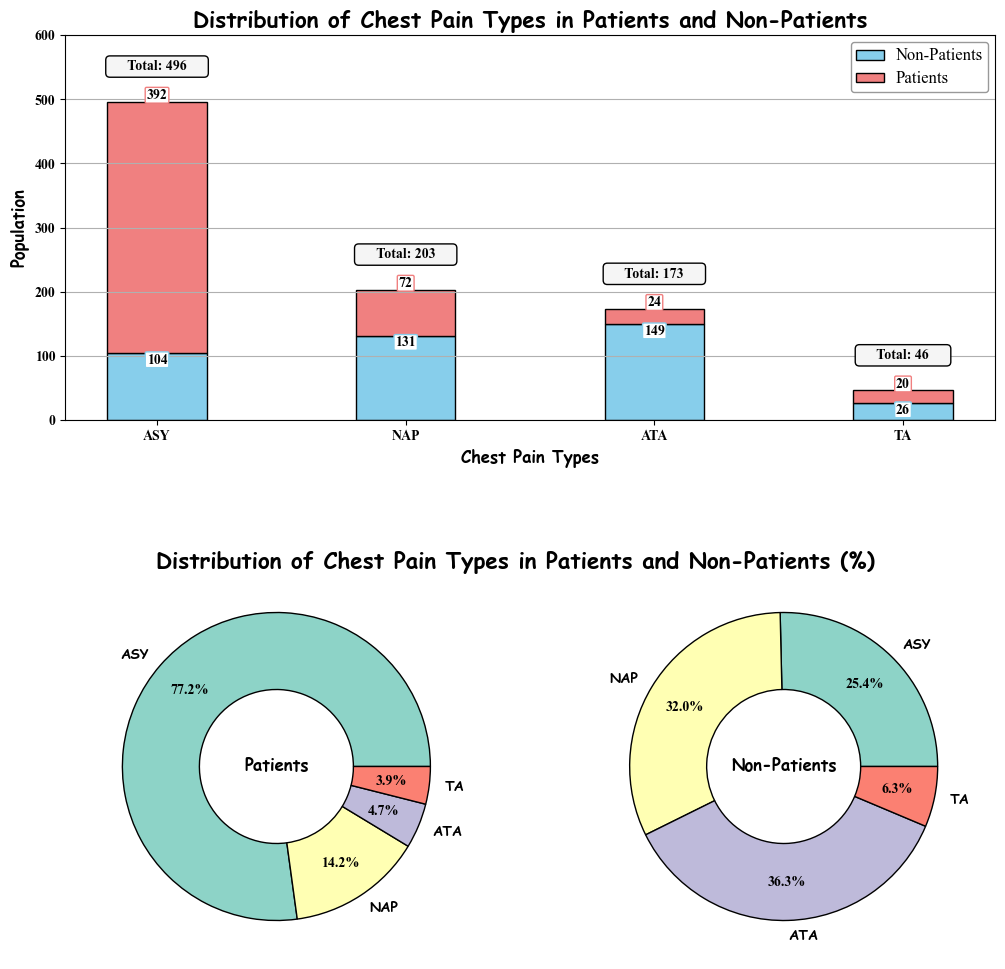

  ChestPainType  counts of Patients  counts of Non-Patients
0           ASY                 392                     104
1           NAP                  72                     131
2           ATA                  24                     149
3            TA                  20                      26


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec




""" 
Classify cardiovascular patients and non-patient
bsade on chest pain type,
SECTION THREE
"""

# Load the Dataframe
df = pd.read_csv("../data/heart-data.csv")

"""
Customize some properties of visualizations
"""
title = {"fontname": "Comic Sans MS", "fontsize": 16, "fontweight": "bold"}
label = {"fontname": "Comic Sans MS", "fontsize": 12, "fontweight": "bold"}

# Adjust the position of x ticks and determine their labels
xticks_labels = ["ASY","NAP", "ATA", "TA"]
xticks = np.arange(len(xticks_labels))

# Calculate the number of patients in each chest pain type and sort by 'xticks_labels'
patients = df[(df["HeartDisease"]==1)]["ChestPainType"].value_counts().reindex(xticks_labels)
patient_counts = list(patients)


# Calculate the number of non-patients in each chest pain type and sort by 'xticks_labels'
non_patients = df[(df["HeartDisease"]==0)]["ChestPainType"].value_counts().reindex(xticks_labels)
non_patient_counts = list(non_patients)


"""
Create the visualizations, 
SECTION THREE
"""


def stacked_bar(ax, xticks, xticks_labels, patient_counts, non_patient_counts):
    # Adjust satacked bars
    ax.bar(xticks, non_patient_counts, width=0.4, label="Non-Patients", edgecolor="black", color="skyblue")
    ax.bar(xticks, patient_counts, width=0.4, bottom=non_patient_counts, label="Patients",edgecolor="black", color="lightcoral")

    # Customize the plot and figure
    ax.set_title("Distribution of Chest Pain Types in Patients and Non-Patients", fontdict=title)
    ax.set_xlabel("Chest Pain Types", fontdict=label)
    ax.set_ylabel("Population", fontdict=label)
    ax.grid(axis="y")

    # Set x ticks and their labels
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks_labels)

    for l in ax.get_xticklabels():
        l.set_fontname("Times New Roman")
        l.set_fontweight("bold")

    # Set y ticks and their labels
    ax.set_yticks(np.arange(0, 650, 100))
    ax.set_yticklabels(np.arange(0, 650, 100))

    for l in ax.get_yticklabels():
        l.set_fontname("Times New Roman")
        l.set_fontweight("bold")

    # Customize and add annotations to (patients) segment to indicate the population of this segment
    for i, v in enumerate(patient_counts):
        ax.annotate(v, xy=(xticks[i], np.add(non_patient_counts[i], patient_counts[i])), xytext=(0, 0), textcoords="offset points",
                    ha="center", va="bottom", fontname="Times New Roman", fontweight="bold",
                    bbox=dict(facecolor="white", edgecolor="lightcoral", boxstyle="round,pad=0.1"))
        

    # Customize and add annotations to (non-patients) segment to indicate the population of this segment
    for i, v in enumerate(non_patient_counts):
        ax.annotate(v, xy=(xticks[i], non_patient_counts[i]), xytext=(0, 0), textcoords="offset points",
                    ha="center", va="top", fontname="Times New Roman", fontweight="bold",
                    bbox=dict(facecolor="white", edgecolor="skyblue", boxstyle="round,pad=0.1"))
        

    # Customize and add annotations to the stacked bars to indicate (the total population) of the segments
    for i, _ in enumerate(patient_counts):
        total_text =f"{5*' '}Total: {np.add(non_patient_counts[i], patient_counts[i])}{5*' '}"

        ax.annotate(total_text, xy=(xticks[i], np.add(non_patient_counts[i], patient_counts[i])),
                    xytext=(0, 30), textcoords="offset points",
                    ha="center", va="top", fontname="Times New Roman", fontweight="bold",
                    bbox=dict(facecolor="whitesmoke", edgecolor="black", boxstyle="round,pad=0.3")
                    )
        
    # Adjust the legend box
    legend = ax.legend(edgecolor="gray")
    for text in legend.get_texts():
        text.set_fontname("Times New Roman")
        text.set_fontsize(12)



def donutChart1(axs2, patients_counts,xticks_labels, label):
    # Set colors and donut chart
    colors = plt.get_cmap("Set3")(np.arange(len(xticks_labels)))
    patch1, text1, autotext1 = axs2.pie(patients_counts, labels=xticks_labels, colors=colors,
                           autopct="%1.1f%%", pctdistance=0.75, wedgeprops=dict(width=0.5))
    # Add edgecolor
    for p1 in patch1:
        p1.set_edgecolor("black")

    # Adjust labels font and style 
    for t1 in text1:
        t1.set_fontname("Comic Sans MS")
        t1.set_fontweight("bold")

    for a1 in autotext1:
        a1.set_fontname("Times New Roman")
        a1.set_fontweight("bold")
    
    # Add text in the center of donut chart
    axs2.text(0, 0, "Patients", fontdict=label, ha="center", va="center")


def donutChart2(axs3, non_patient_counts,xticks_labels, label):
    # Set colors and donut chart
    colors = plt.get_cmap("Set3")(np.arange(len(xticks_labels)))
    patch2, text2, autotext2 = axs3.pie(non_patient_counts, labels=xticks_labels, colors=colors,
                           autopct="%1.1f%%", pctdistance=0.75, wedgeprops=dict(width=0.5))
    
    # Add edgecolor
    for p2 in patch2:
        p2.set_edgecolor("black")

    # Adjust labels font and style 
    for t2 in text2:
        t2.set_fontname("Comic Sans MS")
        t2.set_fontweight("bold")
    
    for a2 in autotext2:
        a2.set_fontname("Times New Roman")
        a2.set_fontweight("bold")
    
    # Add text in the center of donut chart
    axs3.text(0, 0, "Non-Patients", fontdict=label, ha="center", va="center")


def chest_p_t_df(patients, non_patients):
    # Make the dataframe
    patients_ = patients.reset_index(name="counts")
    non_patients_ = non_patients.reset_index(name="counts")
    chest_p_t_df = pd.merge(patients_, non_patients_, on="ChestPainType", suffixes=[" of Patients", " of Non-Patients"])
    #chest_p_t_df.to_csv(...)
    print(chest_p_t_df)




# Make the figure and subplots
fig = plt.figure(figsize=(12, 12)) 
gs = GridSpec(nrows=2, ncols=2, figure=fig, hspace=0.4)
axs1 = fig.add_subplot(gs[0, :])
axs2 = fig.add_subplot(gs[1, 0])
axs3 = fig.add_subplot(gs[1, 1])

# Adjust and add the super title for pie charts
sup_title = plt.suptitle(x=0.5, y=0.45, t="Distribution of Chest Pain Types in Patients and Non-Patients (%)",
                         fontname="Comic Sans MS", fontsize=16, fontweight="bold")

# Run and Show 
stacked_bar(axs1, xticks, xticks_labels, patient_counts, non_patient_counts)
donutChart1(axs2, patient_counts, xticks_labels, label)
donutChart2(axs3, non_patient_counts, xticks_labels, label)
#plt.savefig(...)
plt.show()

chest_p_t_df(patients, non_patients)



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec




""" 
Classify cardiovascular patients and non-patient
bsade on lab measurments,
SECTION FOUR
"""

# Load the Dataframe
df = pd.read_csv("../data/heart-data.csv")

# Calculate and Categorize resting blood pressure factor data
resting_bp_data = {
    "mean": df.groupby("HeartDisease")["RestingBP"].mean(),
    "min": df.groupby("HeartDisease")["RestingBP"].min(),
    "max": df.groupby("HeartDisease")["RestingBP"].max(),
    "high_bp_count": {
        "patients": df[(df["HeartDisease"] == 1) & (df["RestingBP"] >= 120)].shape[0],
        "non-patients": df[(df["HeartDisease"] == 0) & (df["RestingBP"] >= 120)].shape[0]
    },
    "low_bp_count": {
        "patients": df[(df["HeartDisease"] == 1) & (df["RestingBP"] < 120)].shape[0],
        "non-patients": df[(df["HeartDisease"] == 0) & (df["RestingBP"] < 120)].shape[0]
    }
}

# Create resting blood pressure factor dataframe
resting_bp_data_df = pd.DataFrame({
    "Patients": {
        "Mean": resting_bp_data["mean"][1],
        "Min": resting_bp_data["min"][1],
        "Max": resting_bp_data["max"][1],
        "High BP Count": resting_bp_data["high_bp_count"]["patients"],
        "Low BP Count": resting_bp_data["low_bp_count"]["patients"]
    },
    "Non-Patients": {
        "Mean": resting_bp_data["mean"][0],
        "Min": resting_bp_data["min"][0],
        "Max": resting_bp_data["max"][0],
        "High BP Count": resting_bp_data["high_bp_count"]["non-patients"],
        "Low BP Count": resting_bp_data["low_bp_count"]["non-patients"]
    }
})



# Calculate and Categorize cholesterol factor data
cholesterol_data = {
    "mean": df.groupby("HeartDisease")["Cholesterol"].mean(),
    "min": df.groupby("HeartDisease")["Cholesterol"].min(),
    "max": df.groupby("HeartDisease")["Cholesterol"].max(),
    
    "high_cholesterol_count": {
        "patients": df[(df["HeartDisease"] == 1) & (df["Cholesterol"] > 240)].shape[0],
        "non-patients": df[(df["HeartDisease"] == 0) & (df["Cholesterol"] > 240)].shape[0]
    },
    
    "borderline_high_count": {
        "patients": df[(df["HeartDisease"] == 1) & (df["Cholesterol"].between(200, 239))].shape[0],
        "non-patients": df[(df["HeartDisease"] == 0) & (df["Cholesterol"].between(200, 239))].shape[0]
    },
    
    "desirable_count": {
        "patients": df[(df["HeartDisease"] == 1) & (df["Cholesterol"] < 200)].shape[0],
        "non-patients": df[(df["HeartDisease"] == 0) & (df["Cholesterol"] < 200)].shape[0]
    }
}


# Create cholesterol factor dataframe
cholesterol_data_df = pd.DataFrame({
    "Patients": {
        "Mean": cholesterol_data["mean"][1],
        "Min": cholesterol_data["min"][1],
        "Max": cholesterol_data["max"][1],
        "High Cholesterol Count (>240)": cholesterol_data["high_cholesterol_count"]["patients"],
        "Borderline High (200–239)": cholesterol_data["borderline_high_count"]["patients"],
        "Desirable (<200)": cholesterol_data["desirable_count"]["patients"]
    },
    "Non-Patients": {
        "Mean": cholesterol_data["mean"][0],
        "Min": cholesterol_data["min"][0],
        "Max": cholesterol_data["max"][0],
        "High Cholesterol Count (>240)": cholesterol_data["high_cholesterol_count"]["non-patients"],
        "Borderline High (200–239)": cholesterol_data["borderline_high_count"]["non-patients"],
        "Desirable (<200)": cholesterol_data["desirable_count"]["non-patients"]
    }
})


# Calculate and Categorize fasting blood sugar factor data
fasting_bs_data = {
    "passing_threshold_count": {
        "patients": df[(df["HeartDisease"] == 1) & (df["FastingBS"] == 1)].shape[0],
        "non-patients": df[(df["HeartDisease"] == 0) & (df["FastingBS"] == 1)].shape[0]
    },
    "not_passing_threshold_count": {
        "patients": df[(df["HeartDisease"] == 1) & (df["FastingBS"] == 0)].shape[0],
        "non-patients": df[(df["HeartDisease"] == 0) & (df["FastingBS"] == 0)].shape[0]
    }
}


# Create fasting blood sugar factor dataframe
fasting_bs_data_df = pd.DataFrame({
    "Patients": {
        "Passing Threshold (FastingBS=1)": fasting_bs_data["passing_threshold_count"]["patients"],
        "Not Passing Threshold (FastingBS=0)": fasting_bs_data["not_passing_threshold_count"]["patients"]
    },
    "Non-Patients": {
        "Passing Threshold (FastingBS=1)": fasting_bs_data["passing_threshold_count"]["non-patients"],
        "Not Passing Threshold (FastingBS=0)": fasting_bs_data["not_passing_threshold_count"]["non-patients"]
    }
})


"""
Create the visualizations, 
SECTION FOUR
"""
# this part will be completed ...








print(resting_bp_data_df)
print(100*"-")
print(cholesterol_data_df)
print(100*"-")
print(fasting_bs_data_df)

                 Patients  Non-Patients
Mean           134.185039    130.180488
Min              0.000000     80.000000
Max            200.000000    190.000000
High BP Count  420.000000    337.000000
Low BP Count    88.000000     73.000000
----------------------------------------------------------------------------------------------------
                                 Patients  Non-Patients
Mean                           175.940945    227.121951
Min                              0.000000      0.000000
Max                            603.000000    564.000000
High Cholesterol Count (>240)  191.000000    164.000000
Borderline High (200–239)      108.000000    129.000000
Desirable (<200)               209.000000    109.000000
----------------------------------------------------------------------------------------------------
                                     Patients  Non-Patients
Passing Threshold (FastingBS=1)           170            44
Not Passing Threshold (FastingBS=0)       338 